# Visualize The Gradients Against Time
Plot the gradient of delta fSaO2 delta feature for selected features against time for different rounds of sheep data

In [3]:
import pandas as pd
from custom_sobolev_training.data_gen import DifferenceComputer, ForwardDifference
from custom_sobolev_training.complex_differences import LabelBinnedDifference
from custom_sobolev_training.outlier_reject import StdDevOutlierRejector 
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

data = pd.read_csv("../data/combined_LLPSA2.csv")
grouping_column = "experiment_id"
groups = data[grouping_column].unique().tolist()
x_scaler = RobustScaler()
y_scaler = RobustScaler()
data.iloc[:, :20] = x_scaler.fit_transform(data.iloc[:, :20])
data.iloc[:, 22] = y_scaler.fit_transform(data.iloc[:, 22].to_numpy().reshape(-1, 1))

def plot_feature_grad(feature_idx: int, label_idx: int, comp: DifferenceComputer):
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    for group in groups:
        group_data = data[data[grouping_column] == group]
        x = group_data.iloc[:, feature_idx].to_numpy()
        y = group_data.iloc[:, label_idx].to_numpy()
        dy_dx, _ = comp.compute_difference(y, x)
        dy_dx = dy_dx.reshape(-1, 1)
        dy_dx, indices_to_keep = StdDevOutlierRejector(m=3.0).reject_outliers(dy_dx, [0])
        x = x[indices_to_keep]
        ax[0].plot(x, label=group)
        ax[1].plot(dy_dx, label=group)
    ax[0].legend()
    ax[1].legend()
    plt.show()

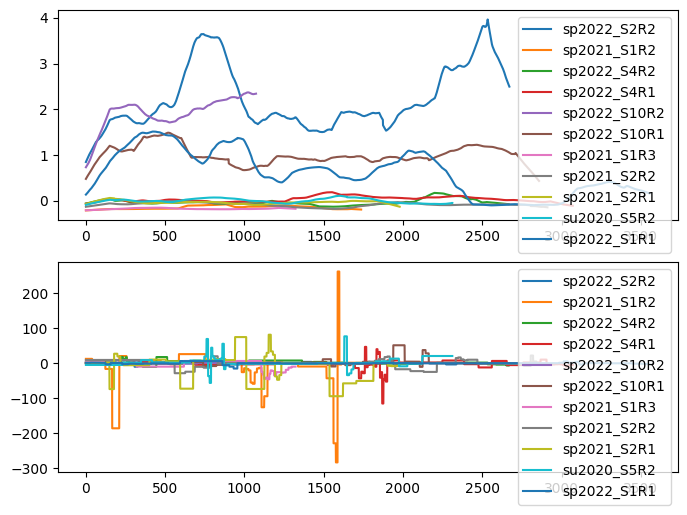

In [4]:
plot_feature_grad(0, 22, LabelBinnedDifference(0.05))